In [ ]:
!pip uninstall tensorflow


Found existing installation: tensorflow 2.8.2+zzzcolab20220629235552
Uninstalling tensorflow-2.8.2+zzzcolab20220629235552:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220629235552.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220629235552


In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 22 kB/s 
     |████████████████████████████████| 463 kB 33.1 MB/s 
     |████████████████████████████████| 1.3 MB 53.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [ ]:
!pip install tensorflow-gpu==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 19 kB/s 


In [ ]:
!nvidia-smi 

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import seaborn as sns

Mounted at /content/drive/


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train'
valid_path = '/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/validation'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 0s 0us/step


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=90,rescale = 1./255)

test_datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=90,rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train',
                                                 target_size = (224, 224),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

Found 42210 images belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/validation',
                                            target_size = (224, 224),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 9048 images belonging to 2 classes.


In [17]:
#os.listdir(checkpoint_dir)
import os
#os.mkdir('/content/drive/MyDrive/VGG16 Model')
os.mkdir('/content/drive/MyDrive/Resnet Model/wgan Checkpoint')
os.mkdir('/content/drive/MyDrive/Resnet Model/wgan Checkpoint/training')


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [18]:
import tensorflow as tf
from tensorflow import keras
import os


checkpoint_path = ("/content/drive/MyDrive/Resnet Model/wgan Checkpoint/training'/weights-improvement-{epoch:02d}-fval_acc:.2f.hdf5")
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

In [19]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks= [cp_callback]
)
model.save("/content/drive/MyDrive/Resnet Model//Resnet(wgan)_model.h5")

Epoch 1/10
85/85 [==============================] - 14343s 169s/step - loss: 1.3480 - accuracy: 0.5544 - val_loss: 0.6395 - val_accuracy: 0.6211
Epoch 2/10
85/85 [==============================] - 1004s 12s/step - loss: 0.6586 - accuracy: 0.6122 - val_loss: 0.6036 - val_accuracy: 0.6391
Epoch 3/10
85/85 [==============================] - 981s 12s/step - loss: 0.5991 - accuracy: 0.6990 - val_loss: 0.5445 - val_accuracy: 0.7455
Epoch 4/10
85/85 [==============================] - 967s 11s/step - loss: 0.5902 - accuracy: 0.6805 - val_loss: 0.4995 - val_accuracy: 0.8150
Epoch 5/10
85/85 [==============================] - 968s 11s/step - loss: 0.5546 - accuracy: 0.7233 - val_loss: 0.5300 - val_accuracy: 0.6926
Epoch 6/10
85/85 [==============================] - 968s 11s/step - loss: 0.5587 - accuracy: 0.6905 - val_loss: 0.4524 - val_accuracy: 0.8207
Epoch 7/10
85/85 [==============================] - 961s 11s/step - loss: 0.5305 - accuracy: 0.7370 - val_loss: 0.5797 - val_accuracy: 0.6396
Ep

In [ ]:
from tensorflow.keras.models import load_model

model.load_weights('/content/drive/MyDrive/Resnet Model/Checkpoints/training 1/weights-improvement-48-fval_acc:.2f.hdf5')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

Created model and loaded weights from file


In [ ]:
from tensorflow.keras.models import load_model

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks= [cp_callback]
)


Epoch 1/2
96/96 [==============================] - ETA: 0s - loss: 0.2068 - accuracy: 0.9626  
Epoch 1: saving model to /content/drive/MyDrive/Resnet Model/Checkpoints/Training 2/weights-improvement-01-fval_acc:.2f.hdf5
96/96 [==============================] - 13691s 143s/step - loss: 0.2068 - accuracy: 0.9626 - val_loss: 0.0418 - val_accuracy: 0.9938
Epoch 2/2
96/96 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9944
Epoch 2: saving model to /content/drive/MyDrive/Resnet Model/Checkpoints/Training 2/weights-improvement-02-fval_acc:.2f.hdf5
96/96 [==============================] - 710s 7s/step - loss: 0.0347 - accuracy: 0.9944 - val_loss: 0.0409 - val_accuracy: 0.9945


In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
import shutil 

path = Path("/content/drive/MyDrive/Fyp Dataset (rar file extraction)/test/P").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img)
            print(path+"/"+img_p)
            #shutil.move(path+"/"+img_p)


In [ ]:
shutil.move("/content/drive/MyDrive/Fyp Dataset (rar file extraction)/test/P/generated_img_128x128_e12804.png", "/content/drive/MyDrive")


'/content/drive/MyDrive/generated_img_128x128_e12804.png'

In [ ]:
#model.summary()
from tensorflow.keras.models import load_model


# save the whole model
model.save("/content/drive/MyDrive/Resnet Model/model1_resnet50.h5")

In [ ]:
#%tensorboard --logdir logs/fit

In [ ]:
df.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.6287,0.8213,0.1742,0.9589
1,0.1336,0.9809,0.1057,0.9830
2,0.0907,0.9921,0.0779,0.9946
3,0.0701,0.9940,0.0632,0.9947
4,0.0594,0.9944,0.0542,0.9943
5,0.0539,0.9943,0.0484,0.9946
6,0.0482,0.9945,0.0450,0.9945
7,0.0447,0.9944,0.0438,0.9943
8,0.0420,0.9946,0.0425,0.9946
9,0.0411,0.9945,0.0424,0.9945


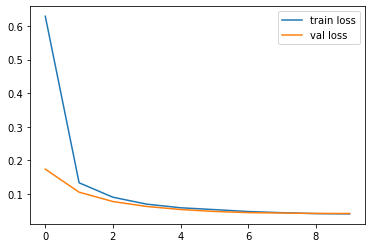

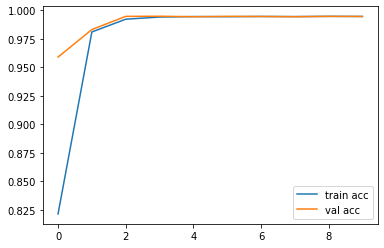

<Figure size 432x288 with 0 Axes>

In [20]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Resnet History.csv')


import matplotlib.pyplot as plt
# plot the loss
plt.plot(df['loss'], label='train loss')
plt.plot(df['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(df['accuracy'], label='train acc')
plt.plot(df['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('VGG16 AccVal_acc')

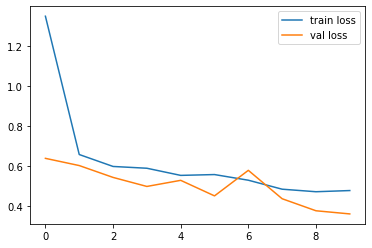

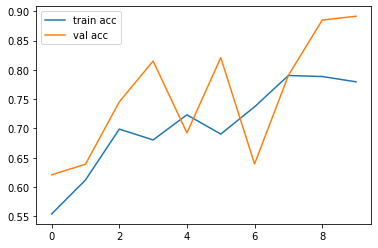

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
#model=load_model('/content/drive/MyDrive/Resnet Model/model_resnet50.h5')
#model=load_model('/content/drive/MyDrive/Xception Model/model_xception.h5')

In [27]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/test',
                                            target_size = (224, 224),
                                            batch_size = 100,
                                            class_mode = 'categorical')

Found 9064 images belonging to 2 classes.


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['No Finding', 'Pneumonia']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[2429 2071]
 [2416 2148]]
Classification Report
              precision    recall  f1-score   support

  No Finding       0.50      0.54      0.52      4500
   Pneumonia       0.51      0.47      0.49      4564

    accuracy                           0.50      9064
   macro avg       0.51      0.51      0.50      9064
weighted avg       0.51      0.50      0.50      9064



In [29]:
cm=confusion_matrix(test_set.classes, y_pred)

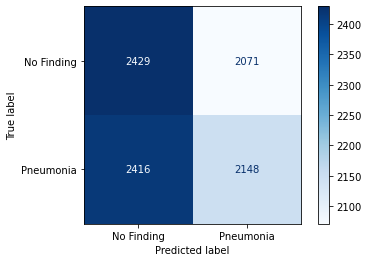

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, y_test)  
plt.show()

In [ ]:
a==1

In [ ]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)